# Cargo Holds: Clean or Dirty
___

#### Background

Owning and operating a dry bulk vessel is challenging.  Earning a profit on any voyage is not a given even with careful calculations, knowledge, and a solid strategy.  Not only only are these profit margins getting thinner but they are absorbing more and more risk to earn them.  One of those risks is fixing a cargo that the vessel's cargo holds might not be ready for on time.  This leads to costly delays, tens of thousands of dollars in time, additional cleaning costs, and damage to a carriers reputation with a charterer.
___

#### Problem Statement

Vessel operators have to decide a vessel's next cargo well ahead of knowing the condition her holds will be in when the vessel arrives to load the cargo.  The operator may have some knowledge to this problem, such as: the vessel's cargo histroy, overall condition of her holds coatings from the time of hire, and possibly the crew's experience and capability preparing the vessel's holds.  However, the determination of the suitability of her holds is left to an inspector's review of her holds before loading that the vessel operator does not have knowledge of in advance.
___

#### Solution

That is why we have created this model.  With this deep learning CNN model, we have trained it on thousands of images of clean and dirty cargo holds against pictures of vessels that have passed inspection.  With this tool the vessel operator can quickly determine the likliehood, not a guarantee, that the vessel's holds will be accepted for the intended cargo.
___

#### Evidence

This project lays out the steps and strategy taken to produce a model of distinguishing between a clean and dirty cargo hold.  The model has been measured for accuracy with the goal of reducing false positives.  In the problem of classifying a hold as clean or dirty, clean is a positive outcome and dirty is a negative outcome.  Therefore a false positive, an instance where the model incorrectly predicts the holds are clean, are limited. 
___

#### Engage

The model is only as good as the images it is provided.  If the images provided omit trouble spots or are not providing enough detail the results will be misleading.  The tool can be tried by submitting an image to the following link.

___

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import os
from PIL import Image

from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array, load_img


## Data
___

There were no publicly available datasets found online.  The dataset for this problem had to be collected.

#### Data Collection

The data was provided by Three Ds Marine Inc, with a few images from the public domain.  Three Ds Marine Inc is a cargo hold cleaning company based out of the Columbia River.  They were chosen, as not only do they do great work, because they are hired to prepare vessels for some of the more challenging cargo cleanliness standards to meet.  

The Columbia River is one of the top grain exporteres in the worlds (behind the Mississippi River and Parana River).  Vessels need to be very clean in order to transport grains.  While this cleanliness standard is high, it is not the highest as some cargos need "hospital clean" cargo holds.  These cargos are extremely sensitive to contamination, such as soda ash.  The Columbia River is also one of the largest exporters of soda ash which is used in the production of glass, detergents, batteries amongst other uses.

<u> **A stretch goal of this problem is to work with Three Ds to build out an architecure to collect, organize, label, and update the model on an ongoing basis.** <u>
___

####  Data Organization

For the image classification problem the model is going to determine if a cargo hold is clean or dirty.  The iamges wwer individually reviewed and labeled clean or dirty.

**The images were renamed to improve organization.**

All image files were converted to jpg.  JPGs are preferred in this instance as they have a good combination of quality and storage size.

____

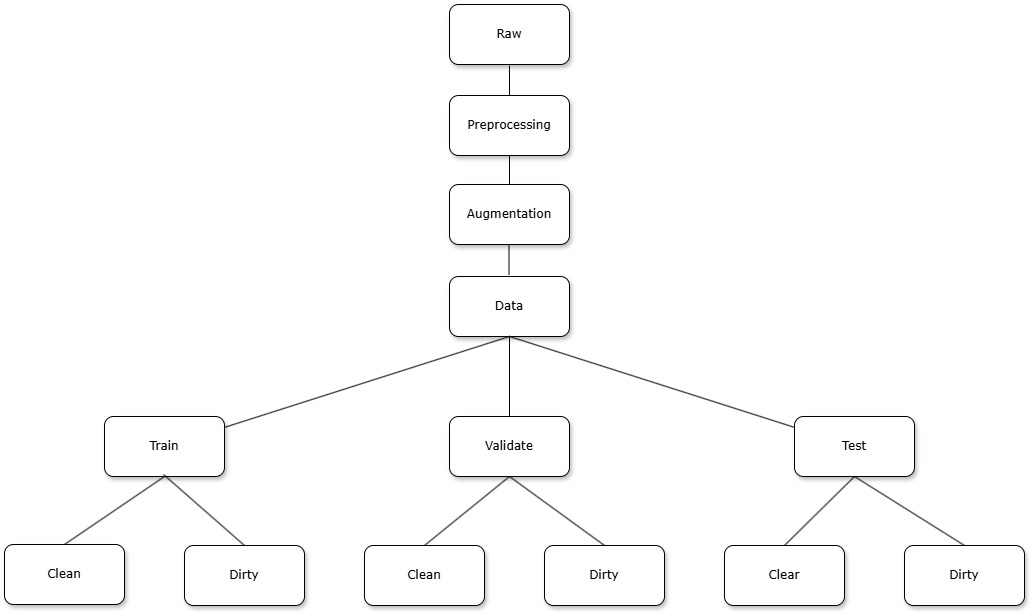

In [2]:
data_directory_iamge = load_img('../assets/Data_Directory.jpg')
data_directory_iamge

#### Data Exploration

The initial data supplied was small and widely imbalanced.  
There were a total of 23 images in the "clean" category and 323 in the "dirty" category.  
This was further reduced by removing images containing people and or cleaning equipment to avoid influencing the model.  
This reduced the dataset further to 12 "clean" images and 141 "dirty" images.

This notebook will explore this initial batch of photos
___

In [78]:
# Review clean cargo hold image
clean1 = load_img('../data/classified/clean/47681173_2008763662504219_1873423245131120640_n.jpg')
clean2 = load_img('../data/classified/clean/48418327_2026951410685444_6927397904709582848_n.jpg')

(720, 540)

In [79]:
# Review dirty cargo hold image
dirty1 = load_img('../data/classified/dirty/46492613_1983209318392987_2701285471404687360_n.jpg')
dirty2 = load_img('../data/classified/dirty/46491446_1983209548392964_3471892652591415296_n.jpg')

(960, 720)

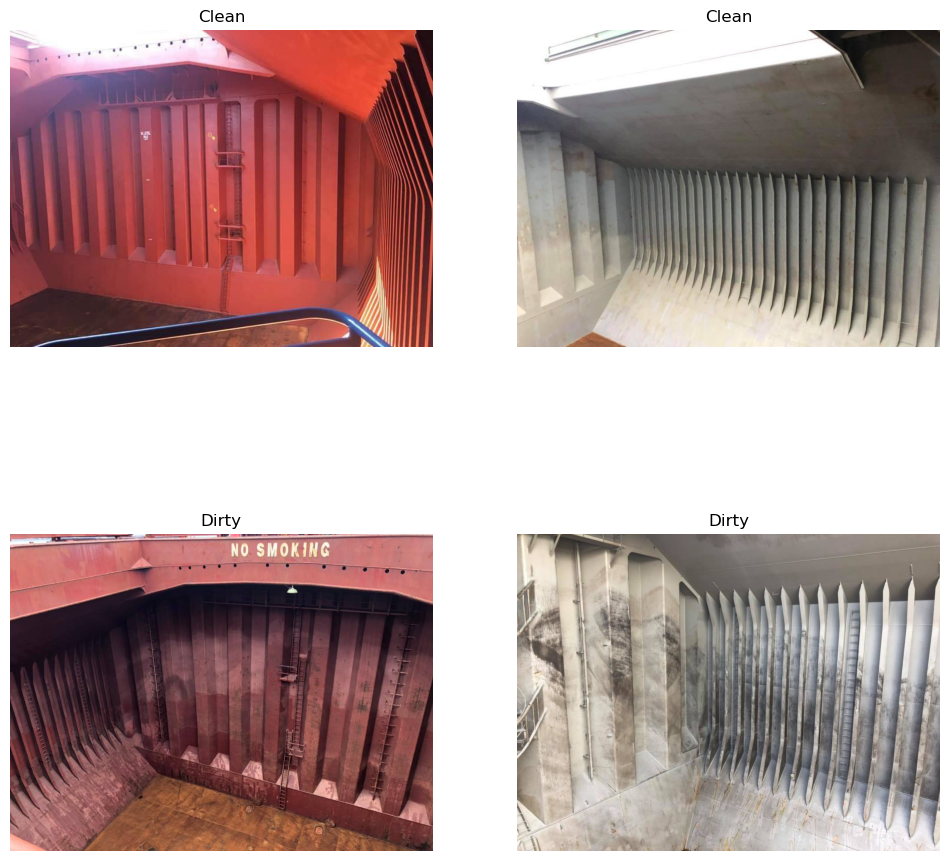

In [53]:
# Comparing side by side

fig, axes = plt.subplots(2, 2, figsize=(12,12))

axes[0, 0].imshow(clean1)
axes[0, 0].set_title('Clean')
axes[0, 0].axis('off')

axes[0, 1].imshow(clean2)
axes[0, 1].set_title('Clean')
axes[0, 1].axis('off')

axes[1, 0].imshow(dirty1)
axes[1, 0].set_title('Dirty')
axes[1, 0].axis('off')

axes[1, 1].imshow(dirty2)
axes[1, 1].set_title('Dirty')
axes[1, 1].axis('off')

plt.show;

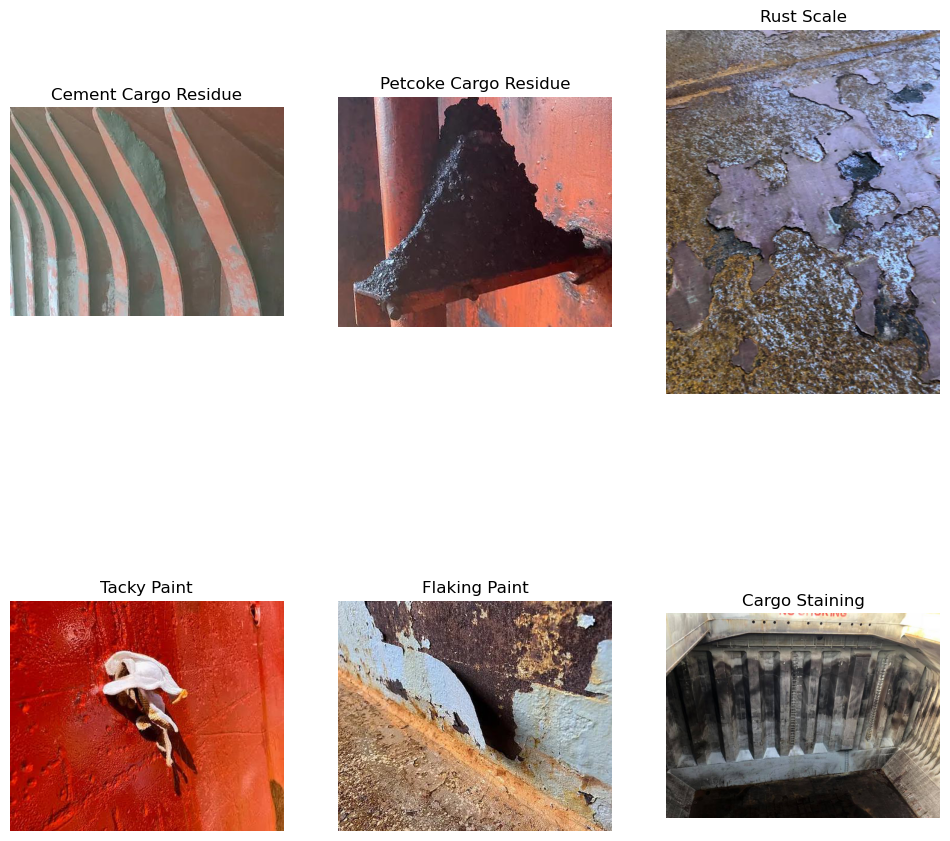

In [66]:
# different types of issues

cargoresidue = load_img('../data/classified/dirty/12c943_1ff40351da324d869a7f3b4c40d1b3e2~mv2.jpg')
cargoresidue2 = load_img('../data/classified/dirty/12c943_d7f225fd2003404b852f6419b877212a~mv2.jpg')
rustscale = load_img('../data/classified/dirty/66714988_2345934515453797_4846150941700784128_n.jpg')
tackypaint = load_img('../data/classified/dirty/12c943_e53efdefc0294acaa30e0a394f266436~mv2.jpg')
flakingpaint = load_img('../data/classified/dirty/12c943_4093a0efc8f14b269b3928618052456e~mv2.jpg')
staining = load_img('../data/classified/dirty/46675044_1983208488393070_2248909549803143168_n.jpg')

fig, axes = plt.subplots(2, 3, figsize=(12,12))

axes[0, 0].imshow(cargoresidue)
axes[0, 0].set_title('Cement Cargo Residue')
axes[0, 0].axis('off')

axes[0, 1].imshow(cargoresidue2)
axes[0, 1].set_title('Petcoke Cargo Residue')
axes[0, 1].axis('off')

axes[0, 2].imshow(rustscale)
axes[0, 2].set_title('Rust Scale')
axes[0, 2].axis('off')

axes[1, 0].imshow(tackypaint)
axes[1, 0].set_title('Tacky Paint')
axes[1, 0].axis('off')

axes[1, 1].imshow(flakingpaint)
axes[1, 1].set_title('Flaking Paint')
axes[1, 1].axis('off')

axes[1, 2].imshow(staining)
axes[1, 2].set_title('Cargo Staining')
axes[1, 2].axis('off')

plt.show;

In [67]:
# How big is the datasets
num_clean = len([i for i in os.listdir('../data/classified/clean/')])
num_dirty = len([i for i in os.listdir('../data/classified/dirty/')])
num_clean, num_dirty

(75, 349)

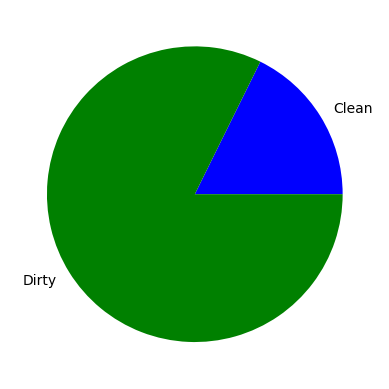

In [73]:
# Simple pie chart
fig, ax = plt.subplots()
ax.pie(x=[num_clean, num_dirty], labels=['Clean', 'Dirty'], colors=['blue', 'green'])
plt.show;

In [88]:
# gather image size ranges
clean_path = '../data/classified/clean/'
dirty_path = '../data/classified/dirty/'

clean_sizes = [load_img(os.path.join(clean_path, i)).size for i in os.listdir(clean_path)]
dirty_sizes = [load_img(os.path.join(dirty_path, i)).size for i in os.listdir(dirty_path)]

max(clean_sizes), min(clean_sizes), max(dirty_sizes), min(dirty_sizes)

((4032, 3024), (447, 382), (4032, 3024), (399, 336))

#### Data Exploration Summary

The initial data set is extremely small and imbalanced.  The data source will provide more data but has been disconnected from the data source.  Until then, for this project the 
___

#### Data Labeling
____

#### Data Pre-processing
___



In [4]:
clean_array =  img_to_array(clean)
clean_array.shape

(540, 720, 3)

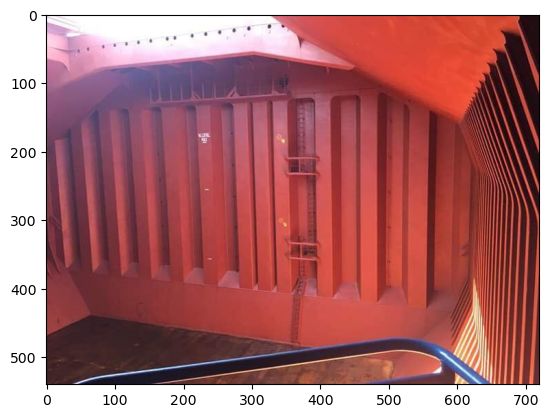

In [5]:
plt.imshow(clean_array/255)

#### Normalizaiotn

___

#### Train Validate Test

___

In [6]:
clean_array_reshaped = clean_array.reshape(clean_array.shape[0], -1)
clean_array_reshaped.shape

(540, 2160)

In [7]:
train, test = image_dataset_from_directory(
    '../data/cargo_holds/',
    image_size=(512, 512),
    batch_size=32,
    label_mode='binary',
    seed=42,
    validation_split=0.1,
    subset='both'
)

Found 120 files belonging to 2 classes.
Using 108 files for training.
Using 12 files for validation.


In [9]:
train.class_names, test.class_names

(['clean_website_reviewed', 'dirty_website_reviewed'],
 ['clean_website_reviewed', 'dirty_website_reviewed'])

To correct imbalance, can try oversampling minority


In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

In [26]:
# make a pipeline to reandom over sample minority class
pipe = make_pipeline(RandomOverSampler(random_state=27))# model)
pipe

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=27))])

In [27]:
gs = GridSearchCV(pipe, {'randomoversampler__sampling_strategy': [.25, .5, .75, 1]}, n_jobs=-1)

In [28]:
gs.fit(train, test)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=27))]) does not.

#### Data Augmentation
___



In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    brightness_range=(0.5, 1.5),
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.1,
    fill_mode='constant'
)